In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

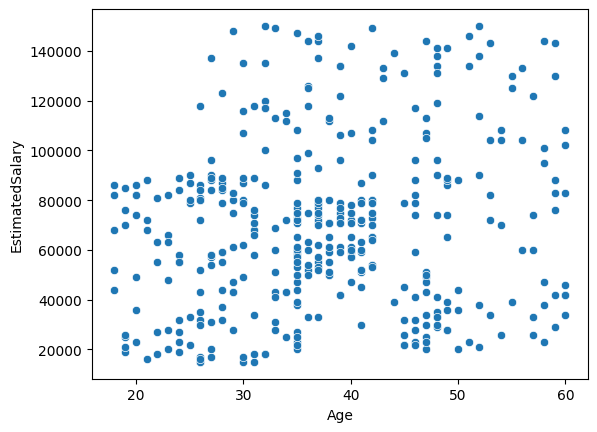

In [8]:
import seaborn as sns

sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

C:\Users\munna\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [12]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

C:\Users\munna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4781 - loss: 45.1861 - val_accuracy: 0.4000 - val_loss: 12.4069
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5406 - loss: 53.2002 - val_accuracy: 0.6000 - val_loss: 72.8212
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5344 - loss: 44.0113 - val_accuracy: 0.4000 - val_loss: 85.8900
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4781 - loss: 58.9743 - val_accuracy: 0.6000 - val_loss: 68.9844
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5531 - loss: 96.1144 - val_accuracy: 0.6000 - val_loss: 47.1321
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5219 - loss: 40.9796 - val_accuracy: 0.4000 - val_loss: 8.0589
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4656 - loss: 13.2207 - val_accuracy: 0.6000 - val_loss: 29.5882
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4719 - loss: 40.8636 - va

In [20]:
# so we can see the value of 'val_accuracy' is moving b/w the value of 40 and 60.

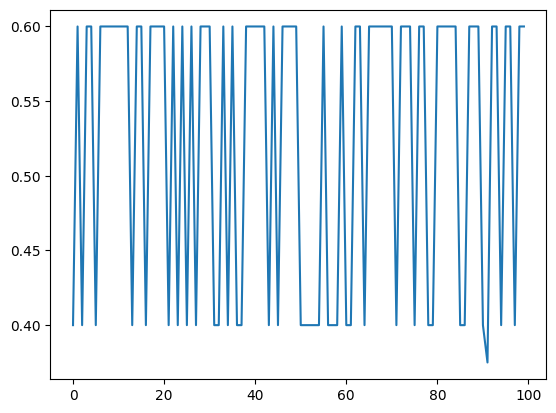

In [22]:
# by plotting 'val_accuracy' we can also see that it is revolving b/w 40 and 60.

import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

<h3> After Apply Scaling </h3>

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

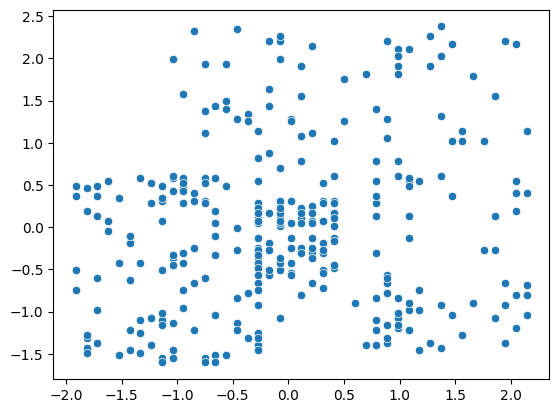

In [29]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

# so from fig. we see distribution is approximately same as it was before.

In [30]:
# Again make our neural network

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

C:\Users\munna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7906 - loss: 0.6193 - val_accuracy: 0.9000 - val_loss: 0.5799
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8500 - loss: 0.5708 - val_accuracy: 0.8250 - val_loss: 0.5330
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8656 - loss: 0.5297 - val_accuracy: 0.8250 - val_loss: 0.4930
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8656 - loss: 0.4944 - val_accuracy: 0.8375 - val_loss: 0.4595
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.4637 - val_accuracy: 0.8125 - val_loss: 0.4311
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8625 - loss: 0.4373 - val_accuracy: 0.8250 - val_loss: 0.4063
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8719 - loss: 0.4138 - val_accuracy: 0.8500 - val_loss: 0.3848
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8844 - loss: 0.3932 - val_accuracy: 0.

In [32]:
# Now we can see that how 'val_accuracy' value shifts and reachs upto 0.9250

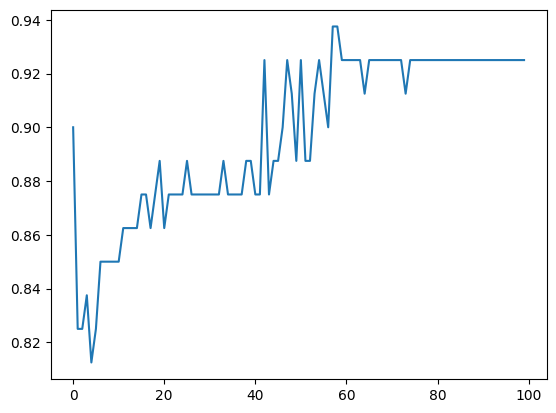

In [34]:
# let's also see it through plotting graph of 'val_accuracy'

import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])

In [35]:
# It happens because we make both inputs on the same scale and after then we use 'standardization'
# that's why our 'gradient_descent' just traverse our 'loss_fxn' easily and finally reach at correct 'optimum-solution' 

In [37]:
# So whenever inputs are on different scale, then try to do 'scaling' first as our preprocessing step.